In [271]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [272]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,MinMaxScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import r2_score,mean_squared_error,silhouette_score,accuracy_score,confusion_matrix 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [273]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [274]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [275]:
data.duplicated().sum()
data.drop_duplicates(inplace=True, keep='last', subset=None, ignore_index=False)
data.duplicated().sum()

0

In [276]:
le = LabelEncoder()

orig_sex = data.sex 
orig_sex_dic = np.unique(orig_sex)

data.sex = le.fit_transform(data.sex)

data.smoker = le.fit_transform(data.smoker)

data.region = le.fit_transform(data.region)

le_sex = data.sex 
le_sex_dic = np.unique(le_sex)

sex_dic = dict(zip(orig_sex_dic,le_sex_dic))
sex_dic

{'female': 0, 'male': 1}

<AxesSubplot:title={'center':'Correlation Matrix'}>

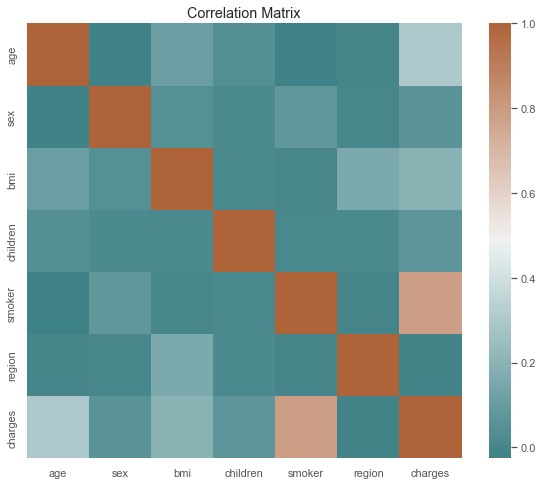

In [277]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(200, 30, as_cmap=True), square=True, ax=ax)

In [278]:
y = data.charges 
x = data.drop(['charges'], axis=1)

In [279]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))

y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [280]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [281]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)

scr_r2 = r2_score(y_test,y_pred).round(3)

scr_r2

0.765

In [282]:
ranfor = RandomForestRegressor(n_estimators=100, n_jobs=-1, criterion='squared_error', random_state=42)

ranfor.fit(x_train,y_train)

y_pred = ranfor.predict(x_test)

scr_mse = mean_squared_error(y_test,y_pred).round(3)

modperf = pd.DataFrame( 
    [ 
        'RandomForestRegressor', scr_mse
    ]
).transpose()

modperf.columns = ['Method', 'Test Mse']

modperf








C:\Users\amunv\AppData\Local\Temp\ipykernel_2704\3124009592.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,Method,Test Mse
0,RandomForestRegressor,0.181
